In [31]:
import json
import pandas as pd

# Open the JSON file
with open(r"C:\Users\khmir\Desktop\SPN internship\sprint 1\data from spn\cars_cleaned.json") as file:
    cars_cleaned_data = json.load(file)

with open(r"C:\Users\khmir\Desktop\SPN internship\sprint 1\data from spn\brands_cleaned.json") as file:
    brands_cleaned_data = json.load(file)

with open(r"C:\Users\khmir\Desktop\SPN internship\sprint 1\data from spn\requests_cleaned.json") as file:
    requests_cleaned_data = json.load(file)





In [32]:
df_cars_cleaned = pd.json_normalize(cars_cleaned_data, sep='_')

print(df_cars_cleaned.loc[0])

brand                                      mercedes-v-class-2023
slug                             mercedes-v-class-2023-ge-963724
isActive                                                    True
isAvailable                                                 True
plateNumber                                            GE 963724
isPro                                                       True
owner                                                        SPN
__v                                                            0
_id_$oid                                668274f8fda998ca4fbad83d
image_url      https://backend.spn-dashboard.com/api/files/im...
image_alt                                                       
image_blur     data:image/webp;base64,UklGRvACAABXRUJQVlA4IOQ...
Name: 0, dtype: object


In [33]:
df_brands_cleaned_data = pd.json_normalize(brands_cleaned_data, sep='_')
print(df_brands_cleaned_data.loc[0])

slug                                             mercedes-v-class-2023
isActive                                                          True
isPrivate                                                        False
manufacturer                                                  Mercedes
model                                                          V-Class
year                                                              2023
__v                                                                  0
bigLuggageCount                                                    4.0
energy                                                          DIESEL
passengerCount                                                     6.0
smallLuggageCount                                                  4.0
subtype                                                            VAN
tier                                                          STANDARD
_id_$oid                                      6682742bfda998ca4fbad82e
image_

In [34]:

df_requests_cleaned_data = pd.json_normalize(requests_cleaned_data, 'services', ['_id', 'reference', 'source', 'isB2B', 'customer', '__v'],
                       record_prefix='service_')


_id_df = pd.json_normalize(df_requests_cleaned_data['_id'], sep='.')
df_requests_cleaned_data = df_requests_cleaned_data.drop(columns=['_id'])
df_requests_cleaned_data = pd.concat([df_requests_cleaned_data, _id_df], axis=1)

print(df_requests_cleaned_data.loc[0])

service_type                                                                           DISPOSAL
service_benchmarks                            [{'source': 'Duran-Hardin', 'details': [{'prod...
service_offers                                [{'details': [{'product': 'bmw-x1-2023', 'pric...
service_details.pickup.location.longitude                                                  9.18
service_details.pickup.location.latitude                                                  48.78
service_details.pickup.location.country                                                 Germany
service_details.pickup.location.city                                                  Stuttgart
service_details.pickup.location.label                                        Stuttgart, Germany
service_details.pickup.date.$date                                   2022-03-12T00:00:00.000000Z
service_details.dropoff.date.$date                                  2022-04-03T00:00:00.000000Z
service_details.products                

In [35]:
print(df_requests_cleaned_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3695 entries, 0 to 3694
Data columns (total 25 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   service_type                                3695 non-null   object 
 1   service_benchmarks                          3695 non-null   object 
 2   service_offers                              3695 non-null   object 
 3   service_details.pickup.location.longitude   3695 non-null   float64
 4   service_details.pickup.location.latitude    3695 non-null   float64
 5   service_details.pickup.location.country     3528 non-null   object 
 6   service_details.pickup.location.city        3695 non-null   object 
 7   service_details.pickup.location.label       3695 non-null   object 
 8   service_details.pickup.date.$date           3695 non-null   object 
 9   service_details.dropoff.date.$date          2422 non-null   object 
 10  service_deta

In [36]:
print(df_requests_cleaned_data.head())

  service_type                                 service_benchmarks  \
0     DISPOSAL  [{'source': 'Duran-Hardin', 'details': [{'prod...   
1     DISPOSAL  [{'source': 'Kirk-Lopez', 'details': [{'produc...   
2     DISPOSAL  [{'source': 'Hinton, Fowler and Berry', 'detai...   
3     TRANSFER  [{'source': 'Thomas, West and Taylor', 'detail...   
4     DISPOSAL  [{'source': 'Smith PLC', 'details': [{'product...   

                                      service_offers  \
0  [{'details': [{'product': 'bmw-x1-2023', 'pric...   
1  [{'details': [{'product': 'bmw-x5-2022', 'pric...   
2  [{'details': [{'product': 'land-rover-range-ro...   
3  [{'details': [{'product': 'mercedes-v-class-20...   
4  [{'details': [{'product': 'bmw-x1-2023', 'pric...   

   service_details.pickup.location.longitude  \
0                                   9.180000   
1                                   7.658056   
2                                  16.373889   
3                                   4.342464   
4       

In [37]:
print(df_requests_cleaned_data.describe())

       service_details.pickup.location.longitude  \
count                                3695.000000   
mean                                    9.187510   
std                                     6.916344   
min                                    -9.140000   
25%                                     4.890033   
50%                                     7.977222   
75%                                    12.483333   
max                                    25.748056   

       service_details.pickup.location.latitude  \
count                               3695.000000   
mean                                  46.200920   
std                                    4.471005   
min                                   33.970000   
25%                                   45.376389   
50%                                   46.470556   
75%                                   48.856614   
max                                   56.675000   

       service_details.smallLuggageCount  service_details.bigLuggageCou

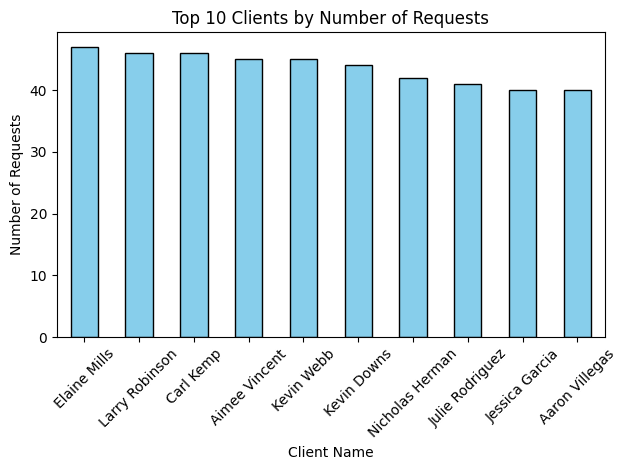

NULL : 0


count             3695
unique             113
top       Elaine Mills
freq                47
Name: customer, dtype: object

In [38]:
import matplotlib.pyplot as plt

client_counts = df_requests_cleaned_data['customer'].value_counts()

top_n_clients = client_counts.head(10)

top_n_clients.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Top 10 Clients by Number of Requests')
plt.xlabel('Client Name')
plt.ylabel('Number of Requests')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
df_requests_cleaned_data['customer'].describe()
client_null = df_requests_cleaned_data['customer'].isnull().sum()
print("NULL :",client_null)
df_requests_cleaned_data['customer'].describe()


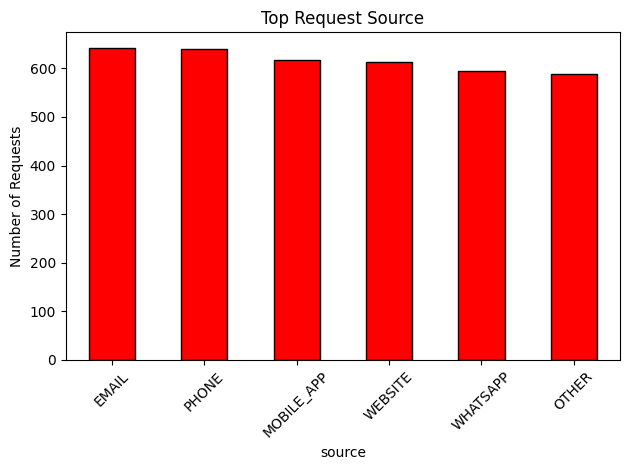

NULL : 0


count      3695
unique        6
top       EMAIL
freq        642
Name: source, dtype: object

In [39]:
import matplotlib.pyplot as plt

client_counts = df_requests_cleaned_data['source'].value_counts()

top_n_clients = client_counts.head(10)

top_n_clients.plot(kind='bar', color='red', edgecolor='black')
plt.title('Top Request Source')
plt.xlabel('source')
plt.ylabel('Number of Requests')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
df_requests_cleaned_data['source'].describe()
source_null = df_requests_cleaned_data['source'].isnull().sum()
print("NULL :",source_null)
df_requests_cleaned_data['source'].describe()


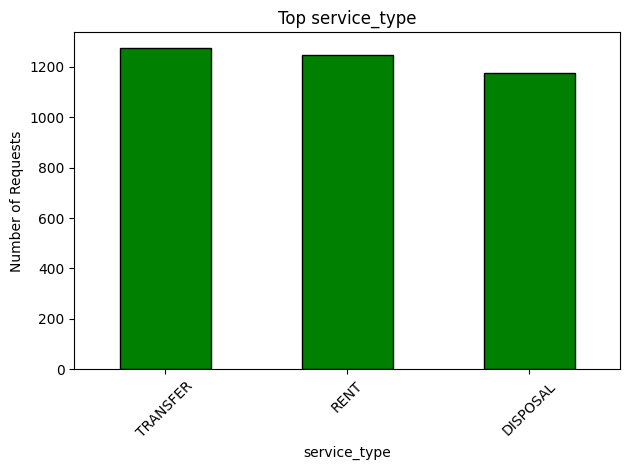

NULL : 0


count         3695
unique           3
top       TRANSFER
freq          1273
Name: service_type, dtype: object

In [40]:
df_requests_cleaned_data['service_type']

import matplotlib.pyplot as plt

client_counts = df_requests_cleaned_data['service_type'].value_counts()

top_n_clients = client_counts.head(10)

top_n_clients.plot(kind='bar', color='green', edgecolor='black')
plt.title('Top service_type')
plt.xlabel('service_type')
plt.ylabel('Number of Requests')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
df_requests_cleaned_data['service_type'].describe()
source_null = df_requests_cleaned_data['service_type'].isnull().sum()
print("NULL :",source_null)
df_requests_cleaned_data['service_type'].describe()


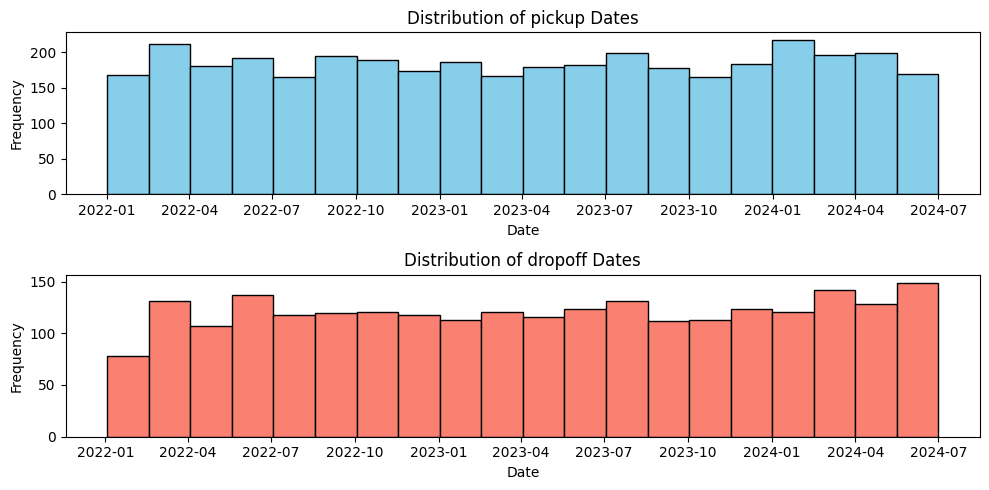

In [41]:
df_requests_cleaned_data['service_details.pickup.date.$date'] = pd.to_datetime(
    df_requests_cleaned_data['service_details.pickup.date.$date'], format='%Y-%m-%dT%H:%M:%S.%fZ'
)

df_requests_cleaned_data['service_details.dropoff.date.$date'] = pd.to_datetime(
    df_requests_cleaned_data['service_details.dropoff.date.$date'], format='%Y-%m-%dT%H:%M:%S.%fZ'
)


plt.figure(figsize=(10, 5))

plt.subplot(2, 1, 1)
plt.hist(df_requests_cleaned_data['service_details.pickup.date.$date'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of pickup Dates')
plt.xlabel('Date')
plt.ylabel('Frequency')
plt.subplot(2, 1, 2)
plt.hist(df_requests_cleaned_data['service_details.dropoff.date.$date'], bins=20, color='salmon', edgecolor='black')
plt.title('Distribution of dropoff Dates')
plt.xlabel('Date')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

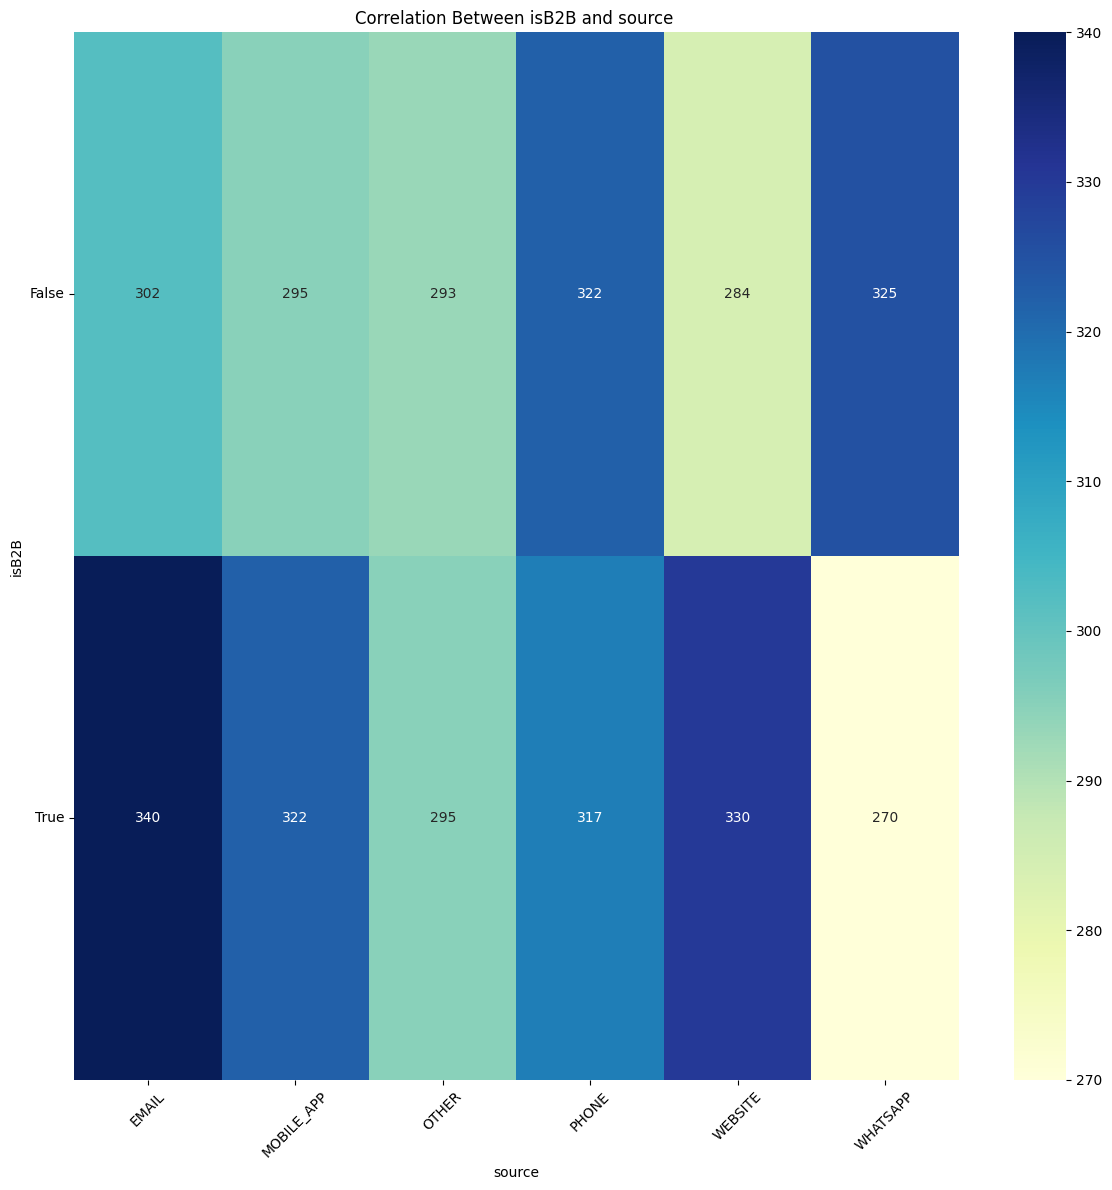

In [42]:
import seaborn as sns

cross_tab = pd.crosstab(df_requests_cleaned_data['isB2B'], df_requests_cleaned_data['source'])

# Plot the heatmap
plt.figure(figsize=(12, 12))
sns.heatmap(cross_tab, annot=True, cmap='YlGnBu', fmt='g')
plt.title('Correlation Between isB2B and source ')
plt.xlabel('source')
plt.ylabel('isB2B')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

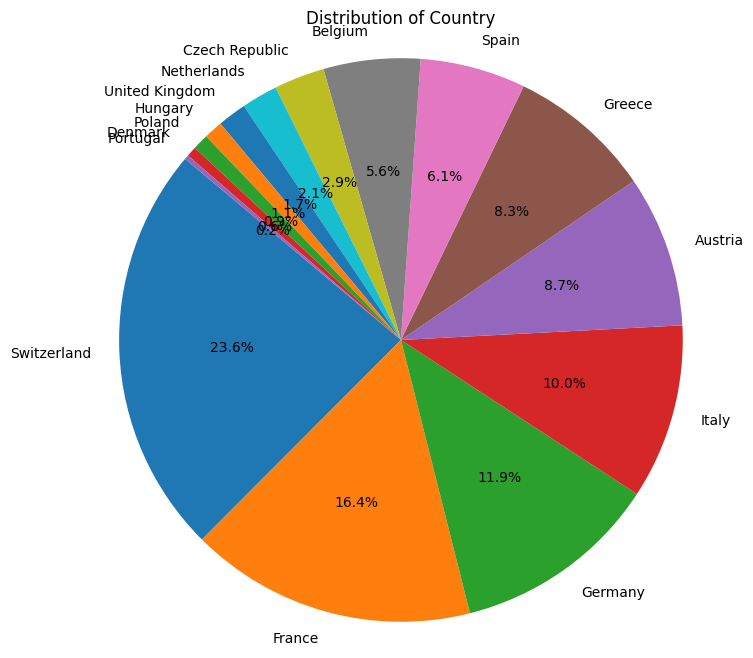

In [43]:
car_owner_distribution = df_requests_cleaned_data['service_details.dropoff.location.country'].value_counts(normalize=True)

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(car_owner_distribution, labels=car_owner_distribution.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Country')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

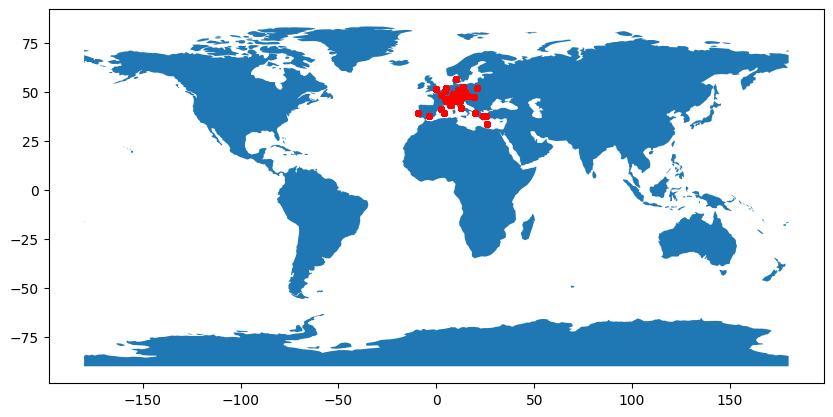

In [44]:
import pandas as pd
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame
import geodatasets


geometry = [Point(xy) for xy in zip(df_requests_cleaned_data['service_details.pickup.location.longitude'], df_requests_cleaned_data['service_details.pickup.location.latitude'])]
gdf = GeoDataFrame(df_requests_cleaned_data, geometry=geometry)

#this is a simple map that goes with geopandas
# deprecated: world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world = gpd.read_file(geodatasets.data.naturalearth.land['url'])
gdf.plot(ax=world.plot(figsize=(10, 6)), marker='o', color='red', markersize=15);

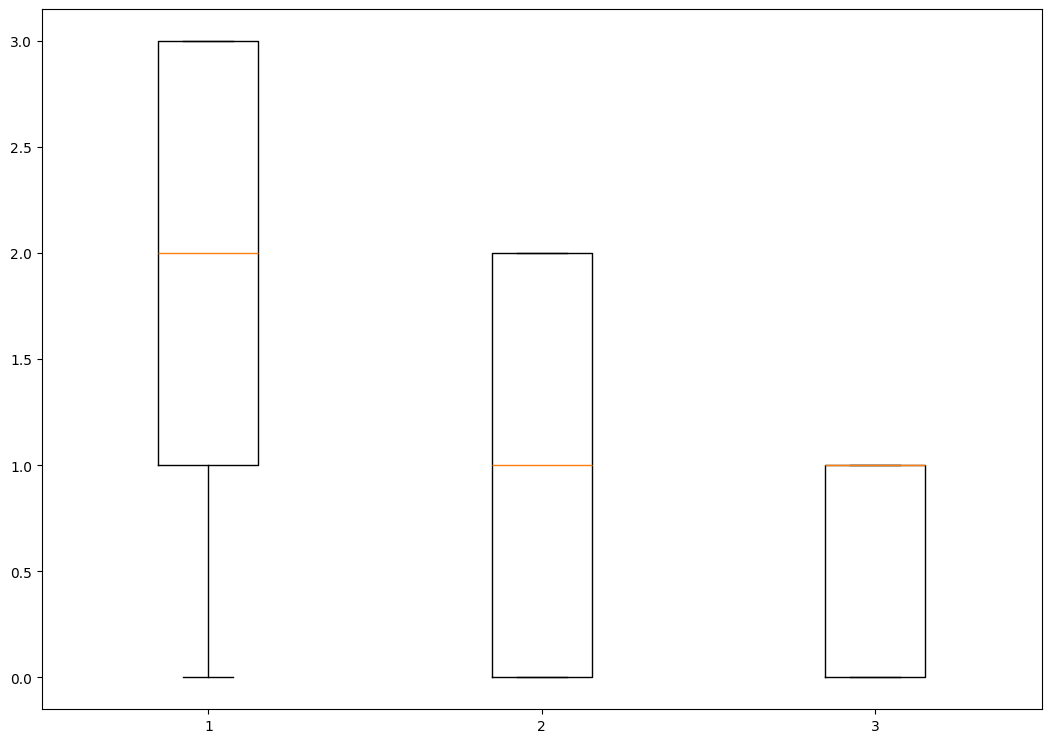

In [45]:
import matplotlib.pyplot as plt

data_1 = df_requests_cleaned_data['service_details.smallLuggageCount']
data_2 = df_requests_cleaned_data['service_details.bigLuggageCount']
data_3 = df_requests_cleaned_data['service_details.babiesCount']
data = [data_1, data_2, data_3]
fig = plt.figure(figsize =(10, 7))

# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])

# Creating plot
bp = ax.boxplot(data)

# show plot
plt.show()